데이터 전처리 과정
==================

> 함수정리
- ((detect_outliers ->  find_outliers)) : 이상치 탐지 함수 
- combine_dong : 동 이름에서 숫자 부분을 제외하고 그룹화하는 함수를 정의

> 데이터프레임 정리
- ((df -> 소득소비)) : 데이터프레임화
- 소득소비.raw : 소득소비 raw 파일 생성

> 데이터프레임 추가 정리
- (( processed_data -> 소득소비)) : data df 에 결국 처리한거니까 소득소비라고 같이 쓰셔도 될것 같아요 
> 변수정리 
- missing : 결측치 확인
- columns_check : 이상치를 확인할 컬럼 리스트화
- column_plot : 시각화할 부분 컬럼
- combine_dongs : 합칠 동들 리스트
- cleaned_data : 이상치 제거
- selected_columns : 필요한 열

> 변수 추가 정리 
- threshold : 이상치 탐지를 위한 가중치 
- path : csv 파일 불러오기

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
path = '../csv/소득소비-행정동.csv'
소득소비_raw = pd.read_csv(path, encoding = 'cp949')
소득소비 = 소득소비_raw.copy()
소득소비.options.display.float_format = '{:}'.format
소득소비.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,20231,11680660,개포1동,5336373,9,250506000.0,70320000.0,8632000,1380000,134557000,0.0,18870000,0,0.0,5140000.0,11607000
1,20231,11680690,개포4동,3550527,7,3535605000.0,905489000.0,67031000,248324000,642305000,158511000.0,176230000,47715000,246719000.0,328323000.0,714958000
2,20231,11680656,도곡2동,6567504,9,51201251000.0,1700247000.0,200892000,156300000,686581000,289318000.0,418130000,159125000,44699373000.0,543709000.0,2347576000
3,20231,11680630,대치4동,4101144,8,57804945000.0,2100242000.0,138814000,139295000,2597010000,1180671000.0,6228110000,673173000,2129640000.0,37289026000.0,5328964000
4,20231,11680700,세곡동,3885403,8,5656119000.0,1588747000.0,54639000,88871000,719191000,786913000.0,684494000,81232000,290703000.0,242007000.0,1119322000


데이터프레임 결측치 확인
======================

In [5]:
# 데이터프레임의 결측치를 확인
missing = 소득소비.isnull().sum()
print('결측치 확인')
print(missing)

결측치 확인
기준_년분기_코드       0
행정동_코드          0
행정동_코드_명        0
월_평균_소득_금액      0
소득_구간_코드        0
지출_총금액          0
식료품_지출_총금액      0
의류_신발_지출_총금액    0
생활용품_지출_총금액     0
의료비_지출_총금액      0
교통_지출_총금액       0
교육_지출_총금액       0
유흥_지출_총금액       0
여가_문화_지출_총금액    0
기타_지출_총금액       0
음식_지출_총금액       0
dtype: int64


In [6]:
column_check = '음식_지출_총금액'

threshold = 3

def detect_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] - mean).abs() > threshold * std]
    return outliers

for dong_code in 소득소비['행정동_코드'].unique():
    # 해당 동의 데이터를 선택
    dong_data = 소득소비[소득소비['행정동_코드'] == dong_code]
    
    # 해당 동의 이상치 확인
    outliers = detect_outliers(dong_data, column_check)
    
    if not outliers.empty:
        print(f"{dong_code} 동의 {column_check} 열의 이상치:")
        print(outliers)
        # 이상치에 대한 처리
    else:
        print(f"{dong_code} 동의 {column_check} 열에 이상치가 없습니다.") 

11680660 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680690 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680656 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680630 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680700 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680640 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680600 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680655 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680580 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680545 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680730 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680531 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680650 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680521 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680610 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680510 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680750 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680670 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680590 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680565 동의 음식_지출_총금액 열에 이상치가 없습니다.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11

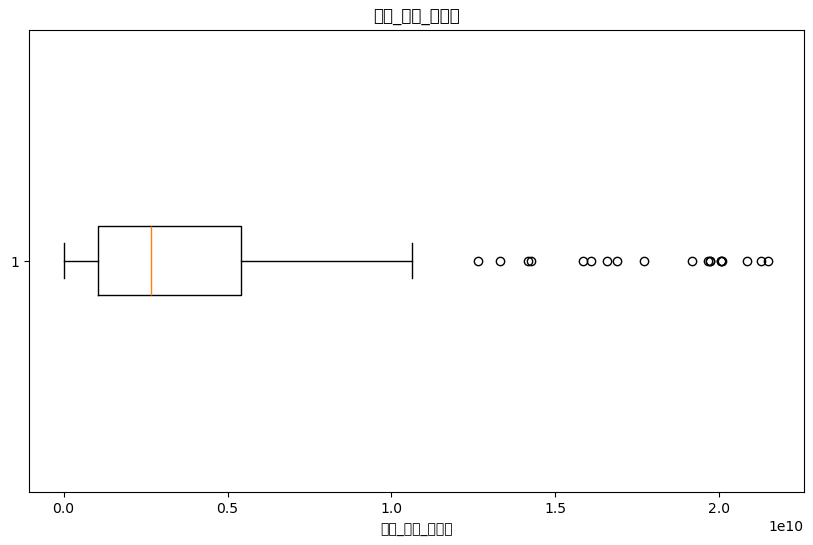

In [8]:
# 그림 그릴 열 선택
column_plot = '음식_지출_총금액'

# 상자 그림 생성
plt.figure(figsize=(10, 6),dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'
plt.boxplot(소득소비[column_plot], vert=False)
plt.title(f'{column_plot}')
plt.xlabel(column_plot)
plt.show()

In [9]:


소득소비 = 소득소비_raw.copy()


In [10]:
# 필요한 열 선택
selected_columns = ['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '월_평균_소득_금액', '지출_총금액', '음식_지출_총금액']

# 동 이름에서 숫자 부분을 제외하고 그룹화하는 함수를 정의
def combine_dong(dong):
    return ''.join(filter(str.isalpha, dong))

# 동 이름에서 숫자 부분을 제외하고 그룹화합니다.
소득소비['행정동_코드_명'] = 소득소비['행정동_코드_명'].apply(combine_dong)

# 필요한 열만 선택하고 동 이름에서 숫자 부분을 제외한 후 중복된 행을 제거
processed_data = 소득소비[selected_columns].drop_duplicates()

# 데이터 출력
print(processed_data)


     기준_년분기_코드    행정동_코드 행정동_코드_명  월_평균_소득_금액        지출_총금액   음식_지출_총금액
0        20231  11680660      개포동     5336373  2.505060e+08    11607000
1        20231  11680690      개포동     3550527  3.535605e+09   714958000
2        20231  11680656      도곡동     6567504  5.120125e+10  2347576000
3        20231  11680630      대치동     4101144  5.780494e+10  5328964000
4        20231  11680700      세곡동     3885403  5.656119e+09  1119322000
..         ...       ...      ...         ...           ...         ...
375      20224  11680700      세곡동     3885403  5.929313e+09  1186333000
376      20224  11680580      삼성동     5098096  4.538079e+10  6194988000
377      20224  11680750      수서동     3847379  7.625836e+10  1510165000
378      20224  11680531      논현동     3973993  2.752541e+10  6057481000
379      20224  11680600      대치동     7421305  1.181893e+10  1125905000

[380 rows x 6 columns]


In [4]:
processed_data.to_csv('소득소비_new.csv',encoding='utf-8-sig')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11

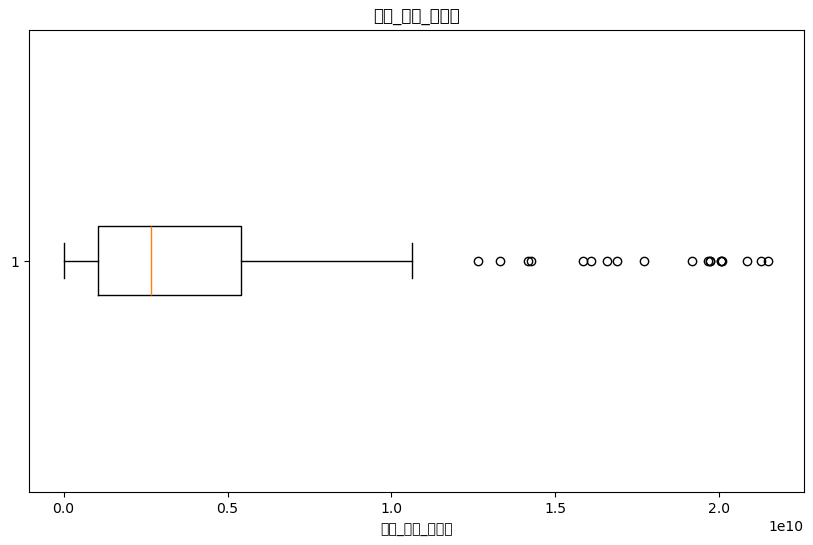

In [11]:
# 그림 그릴 열 선택
column_plot = '음식_지출_총금액'

# 상자 그림 생성
plt.figure(figsize=(10, 6),dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'
plt.boxplot(processed_data[column_plot], vert=False)
plt.title(f'{column_plot}')
plt.xlabel(column_plot)
plt.show()